#Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Train Data

Imported the train dataset and performed some basic operations to understand the data.

In [4]:
data_train=pd.read_csv('https://raw.githubusercontent.com/sehajsaluja17/APMollerMearsk_Task/main/TrainingDataset.csv')
data_train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [6]:
data_train.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [7]:
data_train.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [8]:
data_train.duplicated().sum()

542796

In [9]:
# train_data=data_train.drop_duplicates()
train_data=data_train

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [11]:
train_data.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [12]:
num_negative_values = (train_data['Sourcing Cost'] < 0).sum()
print(num_negative_values)
train_data = train_data[train_data['Sourcing Cost'] >= 0]
print(train_data)

184
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
1             NTM2           X1        A9           DIRECT        Large   
2             NTM3           X2       A20           DIRECT        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
4             NTM2           X1       A28           DIRECT        Large   
...            ...          ...       ...              ...          ...   
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2           X1        A7           DIRECT        Small   
550175        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
0            Powder            May-21   

##Test Data

Imported the test dataset and applied basic functions to understand the data.

In [13]:
data_test=pd.read_csv('https://raw.githubusercontent.com/sehajsaluja17/APMollerMearsk_Task/main/TestDataset.csv')
data_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.3+ KB


In [15]:
data_test.describe()

,Sourcing Cost
count,96.000000
mean,106.208021
std,52.359484
min,4.140000
25%,59.662500
50%,117.245000
75%,144.915000
max,234.710000


In [16]:
data_test.isnull().sum()

ProductType          3
Manufacturer         3
Area Code            3
Sourcing Channel     3
Product Size         3
Product Type         3
Month of Sourcing    3
Sourcing Cost        3
dtype: int64

In [17]:
test_data=data_test.dropna()

In [18]:
test_data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [19]:
test_data.duplicated().sum()

0

In [20]:
num_negative_values = (test_data['Sourcing Cost'] < 0).sum()
print(num_negative_values)

0


In [21]:
test_data.describe()

,Sourcing Cost
count,96.000000
mean,106.208021
std,52.359484
min,4.140000
25%,59.662500
50%,117.245000
75%,144.915000
max,234.710000


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.8+ KB


#EDA

In [23]:
train_data.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

Changed the data type for the "Month of Sourcing" column.

In [24]:
train_data['Month of Sourcing']=pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')
train_data.head()

<ipython-input-24-70d576edb098>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Month of Sourcing']=pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76


In [25]:
train_data_nonindexed=train_data.copy()
print(train_data_nonindexed)

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
1             NTM2           X1        A9           DIRECT        Large   
2             NTM3           X2       A20           DIRECT        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
4             NTM2           X1       A28           DIRECT        Large   
...            ...          ...       ...              ...          ...   
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2           X1        A7           DIRECT        Small   
550175        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
0            Powder        2021-05-01       

Set "Month of Sourcing" as Index to visualize the data as Time Series Analysis

In [26]:
train_data=train_data.set_index('Month of Sourcing')
print(train_data)

                  ProductType Manufacturer Area Code Sourcing Channel  \
Month of Sourcing                                                       
2021-05-01               NTM3           X1       A28        WHOLESALE   
2020-10-01               NTM2           X1        A9           DIRECT   
2020-12-01               NTM3           X2       A20           DIRECT   
2021-02-01               NTM3           X1       A18        WHOLESALE   
2020-11-01               NTM2           X1       A28           DIRECT   
...                       ...          ...       ...              ...   
2020-07-01               NTM2           X1        A5           DIRECT   
2020-10-01               NTM3           X1       A14           DIRECT   
2021-03-01               NTM2           X1        A5           DIRECT   
2021-02-01               NTM2           X1        A7           DIRECT   
2020-11-01               NTM1           X1        A3           DIRECT   

                  Product Size Product Type  Sourc

In [27]:
train_data.index

DatetimeIndex(['2021-05-01', '2020-10-01', '2020-12-01', '2021-02-01',
               '2020-11-01', '2020-09-01', '2020-09-01', '2021-03-01',
               '2020-11-01', '2021-03-01',
               ...
               '2021-02-01', '2021-01-01', '2020-07-01', '2021-02-01',
               '2020-11-01', '2020-07-01', '2020-10-01', '2021-03-01',
               '2021-02-01', '2020-11-01'],
              dtype='datetime64[ns]', name='Month of Sourcing', length=549992, freq=None)

In [28]:
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,
2021-05-01,NTM3,X1,A28,WHOLESALE,Large,Powder,10.16
2020-10-01,NTM2,X1,A9,DIRECT,Large,Powder,134.28
2020-12-01,NTM3,X2,A20,DIRECT,Large,Powder,12.46
2021-02-01,NTM3,X1,A18,WHOLESALE,Small,Powder,107.22
2020-11-01,NTM2,X1,A28,DIRECT,Large,Liquid,197.76


Set "Month of Sourcing" as index for the test set also.

In [29]:
test_data['Month of Sourcing']=pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')
test_data.head()

<ipython-input-29-4f393a884aca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Month of Sourcing']=pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42


In [30]:
test_data_nonindexed=test_data.copy()
print(test_data_nonindexed)

   ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0         NTM1           X1        A1           DIRECT        Small   
1         NTM1           X1       A10           DIRECT        Large   
2         NTM1           X1       A10             ECOM        Large   
3         NTM1           X1       A11           DIRECT        Large   
4         NTM1           X1        A2           DIRECT        Large   
..         ...          ...       ...              ...          ...   
91        NTM3           X1       A44           DIRECT        Small   
92        NTM3           X1        A8           DIRECT        Large   
93        NTM3           X1        A8           DIRECT        Small   
94        NTM3           X2       A20           DIRECT        Large   
95        NTM3           X3       A22           RETAIL        Large   

   Product Type Month of Sourcing  Sourcing Cost  
0        Powder        2021-06-01         103.68  
1        Powder        2021-06-01         155

In [31]:
test_data=test_data.set_index('Month of Sourcing')
print(test_data)

                  ProductType Manufacturer Area Code Sourcing Channel  \
Month of Sourcing                                                       
2021-06-01               NTM1           X1        A1           DIRECT   
2021-06-01               NTM1           X1       A10           DIRECT   
2021-06-01               NTM1           X1       A10             ECOM   
2021-06-01               NTM1           X1       A11           DIRECT   
2021-06-01               NTM1           X1        A2           DIRECT   
...                       ...          ...       ...              ...   
2021-06-01               NTM3           X1       A44           DIRECT   
2021-06-01               NTM3           X1        A8           DIRECT   
2021-06-01               NTM3           X1        A8           DIRECT   
2021-06-01               NTM3           X2       A20           DIRECT   
2021-06-01               NTM3           X3       A22           RETAIL   

                  Product Size Product Type  Sourc

In [32]:
test_data.index

DatetimeIndex(['2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
      

In [33]:
test_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,
2021-06-01,NTM1,X1,A1,DIRECT,Small,Powder,103.68
2021-06-01,NTM1,X1,A10,DIRECT,Large,Powder,155.75
2021-06-01,NTM1,X1,A10,ECOM,Large,Powder,143.02
2021-06-01,NTM1,X1,A11,DIRECT,Large,Powder,139.39
2021-06-01,NTM1,X1,A2,DIRECT,Large,Powder,169.42


<Axes: xlabel='Month of Sourcing'>

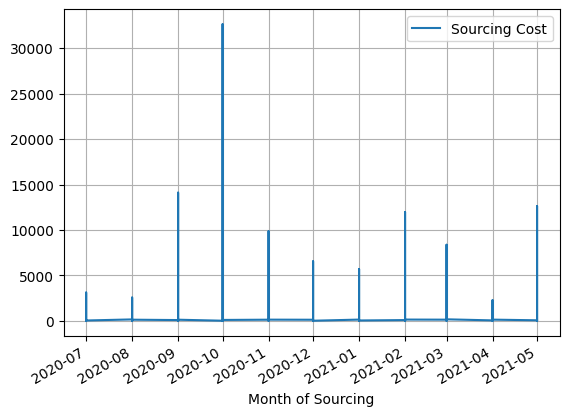

In [32]:
train_data.plot(grid=True)

array([[<Axes: title={'center': 'Sourcing Cost'}>]], dtype=object)

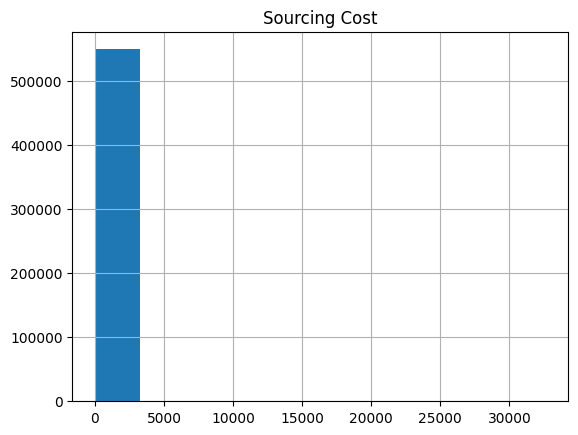

In [33]:
train_data[['Sourcing Cost']].hist()

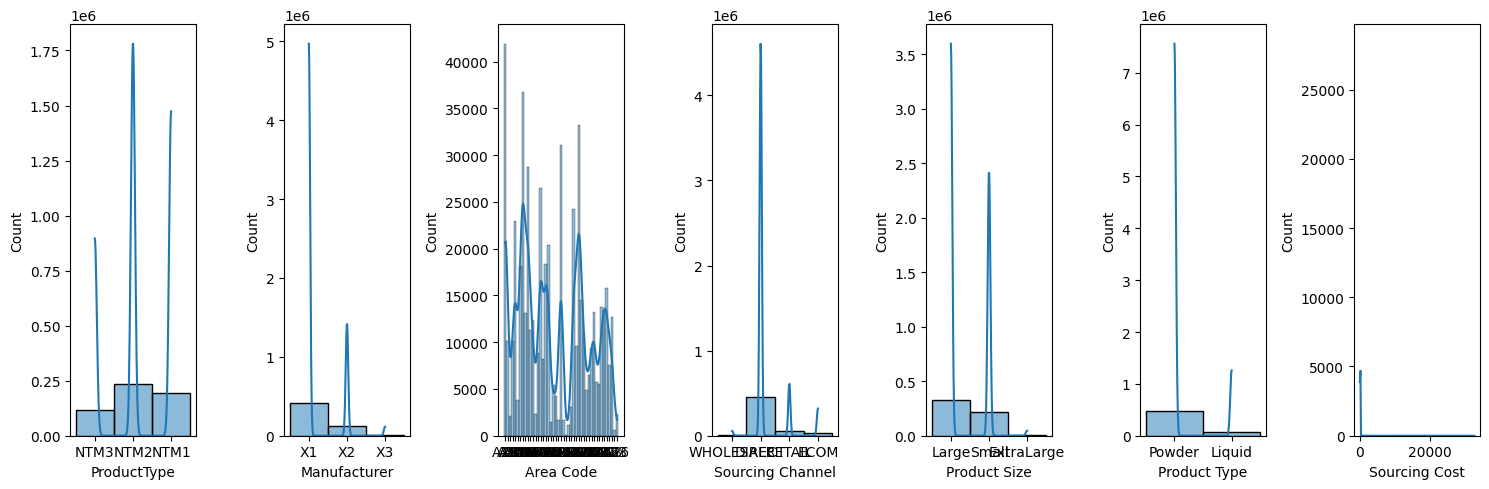

In [34]:
#hist plots for the columns
fig, axes = plt.subplots(nrows=1, ncols=len(train_data.columns), figsize=(15, 5))

for i, column in enumerate(train_data.columns):
    sns.histplot(train_data[column], ax=axes[i], kde=True)

plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

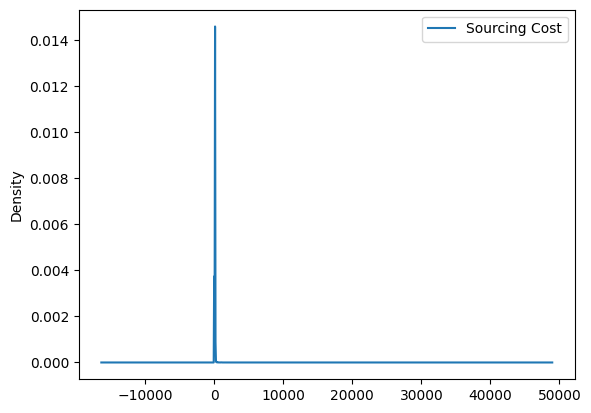

In [112]:
train_data[['Sourcing Cost']].plot(kind='density')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

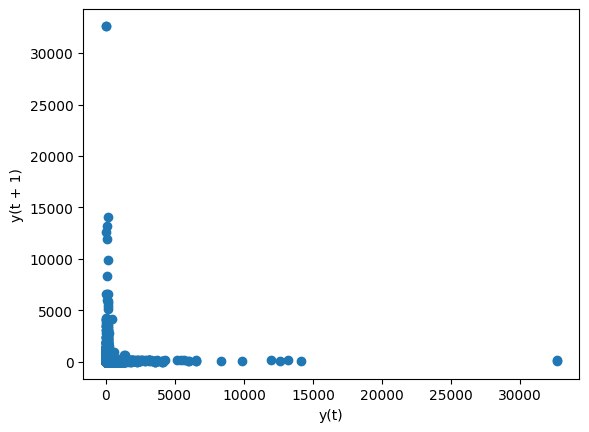

In [113]:
#Lag Plot
pd.plotting.lag_plot(train_data['Sourcing Cost'],lag=1)

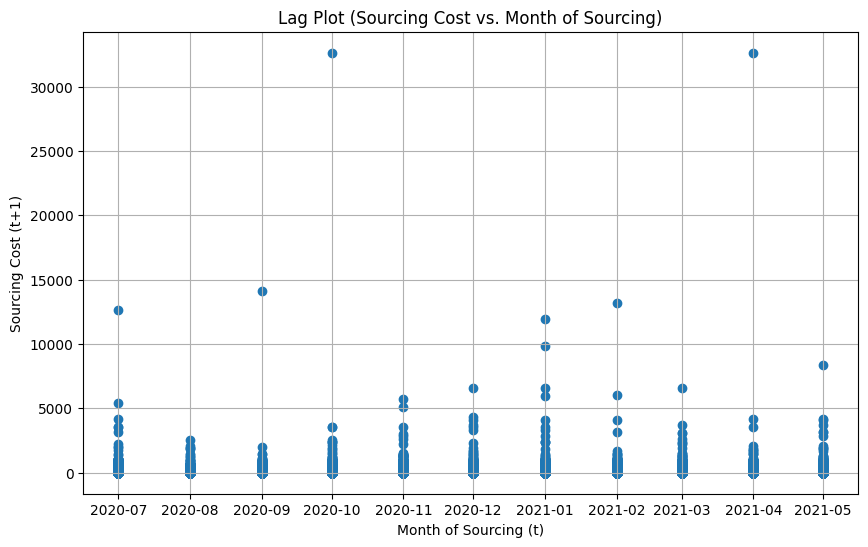

In [114]:
plt.figure(figsize=(10, 6))
plt.title('Lag Plot (Sourcing Cost vs. Month of Sourcing)')
plt.xlabel('Month of Sourcing (t)')
plt.ylabel('Sourcing Cost (t+1)')
plt.scatter(train_data.index, train_data['Sourcing Cost'].shift(1))
plt.grid(True)
plt.show()

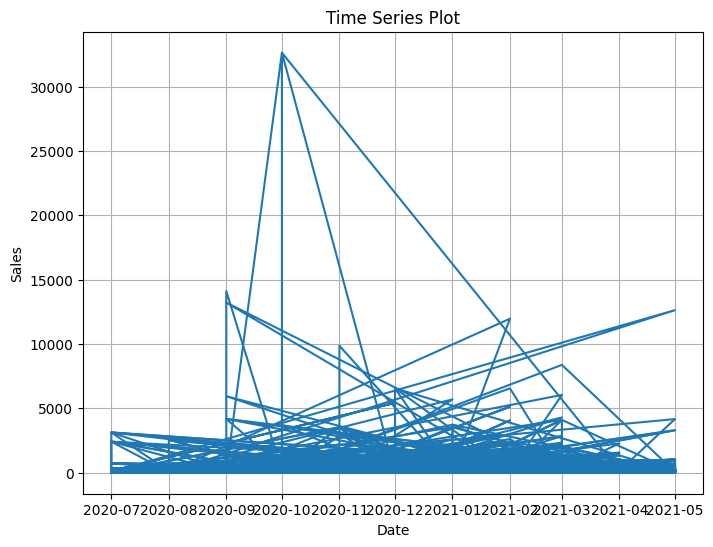

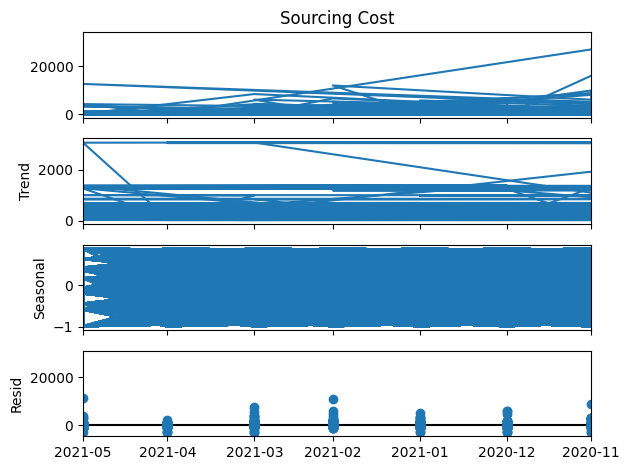

In [115]:
#Time Series and Seasonal Decomposition Plots
from statsmodels.tsa.seasonal import seasonal_decompose
matplotlib.rcParams['agg.path.chunksize'] = 10000
data_to_decompose = train_data['Sourcing Cost']

plt.figure(figsize=(8, 6))
plt.plot(data_to_decompose)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


decomposition = seasonal_decompose(data_to_decompose, model='additive', period=11)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

decomposition.plot()
plt.show()

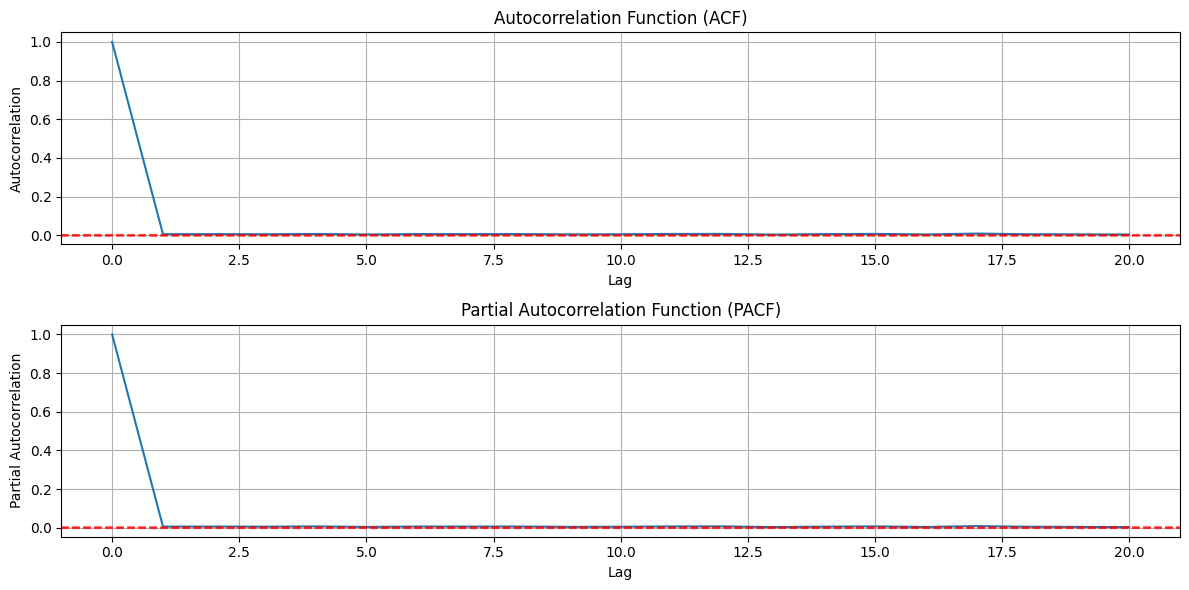

In [116]:
#ACF and PACF Plots
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import numpy as np

acf_result = acf(train_data['Sourcing Cost'], nlags=20)
pacf_result = pacf(train_data['Sourcing Cost'], nlags=20)

conf_int = 1.96 / np.sqrt(len(train_data['Sourcing Cost']))

plt.figure(figsize=(12, 6))

plt.subplot(211)
plt.plot(acf_result)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=-conf_int, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=conf_int, color='r', linestyle='--', alpha=0.5)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.subplot(212)
plt.plot(pacf_result)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=-conf_int, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=conf_int, color='r', linestyle='--', alpha=0.5)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-117-9423e84e45d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Sourcing Cost', y='ProductType', inner='stick', palette='Dark2')


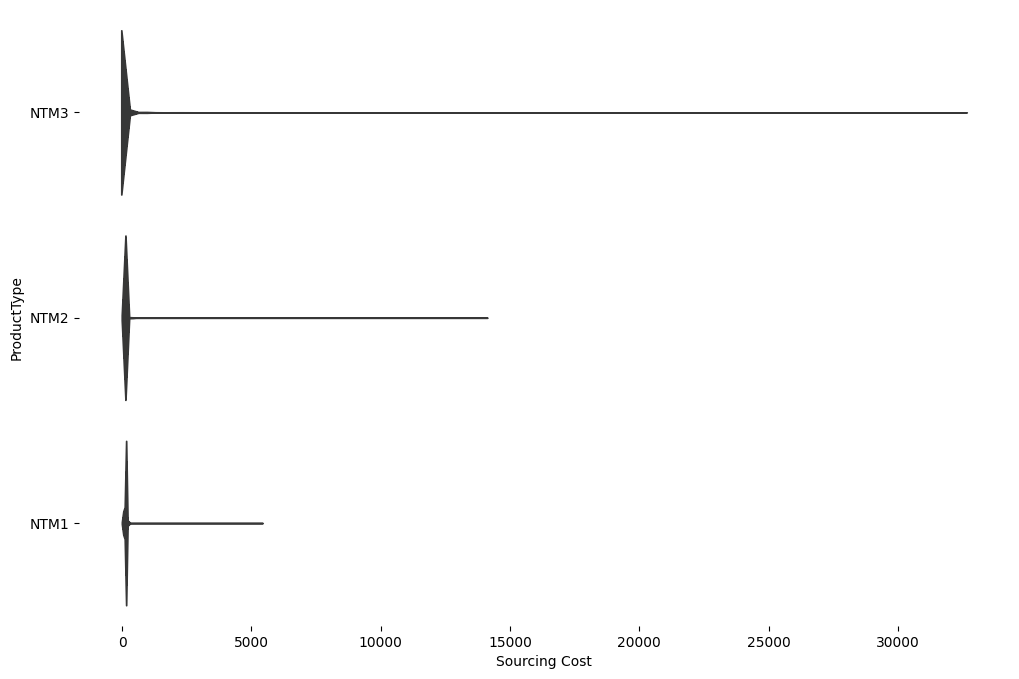

In [117]:
#Violin Plot for Product Type
figsize = (12, 8)
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Sourcing Cost', y='ProductType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-118-ebe5008f662d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Sourcing Cost', y='Manufacturer', inner='stick', palette='Dark2')


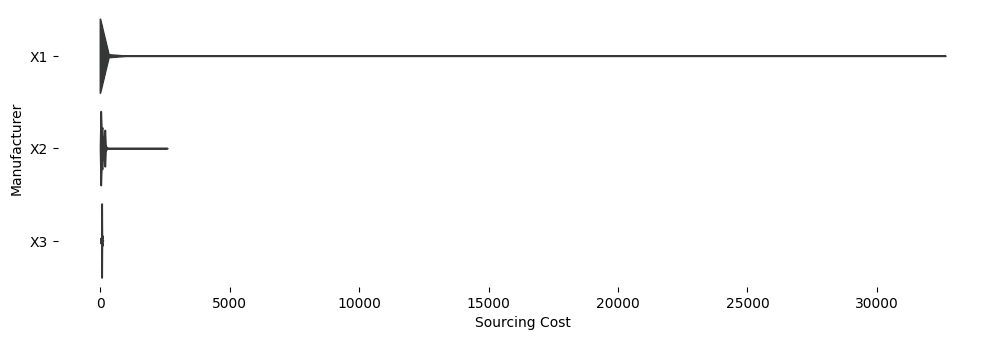

In [118]:
#Violin Plot for Manufacturer
figsize = (12, 1.2 * len(train_data['Manufacturer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Sourcing Cost', y='Manufacturer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-119-b135712681b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Sourcing Cost', y='Area Code', inner='stick', palette='Dark2')


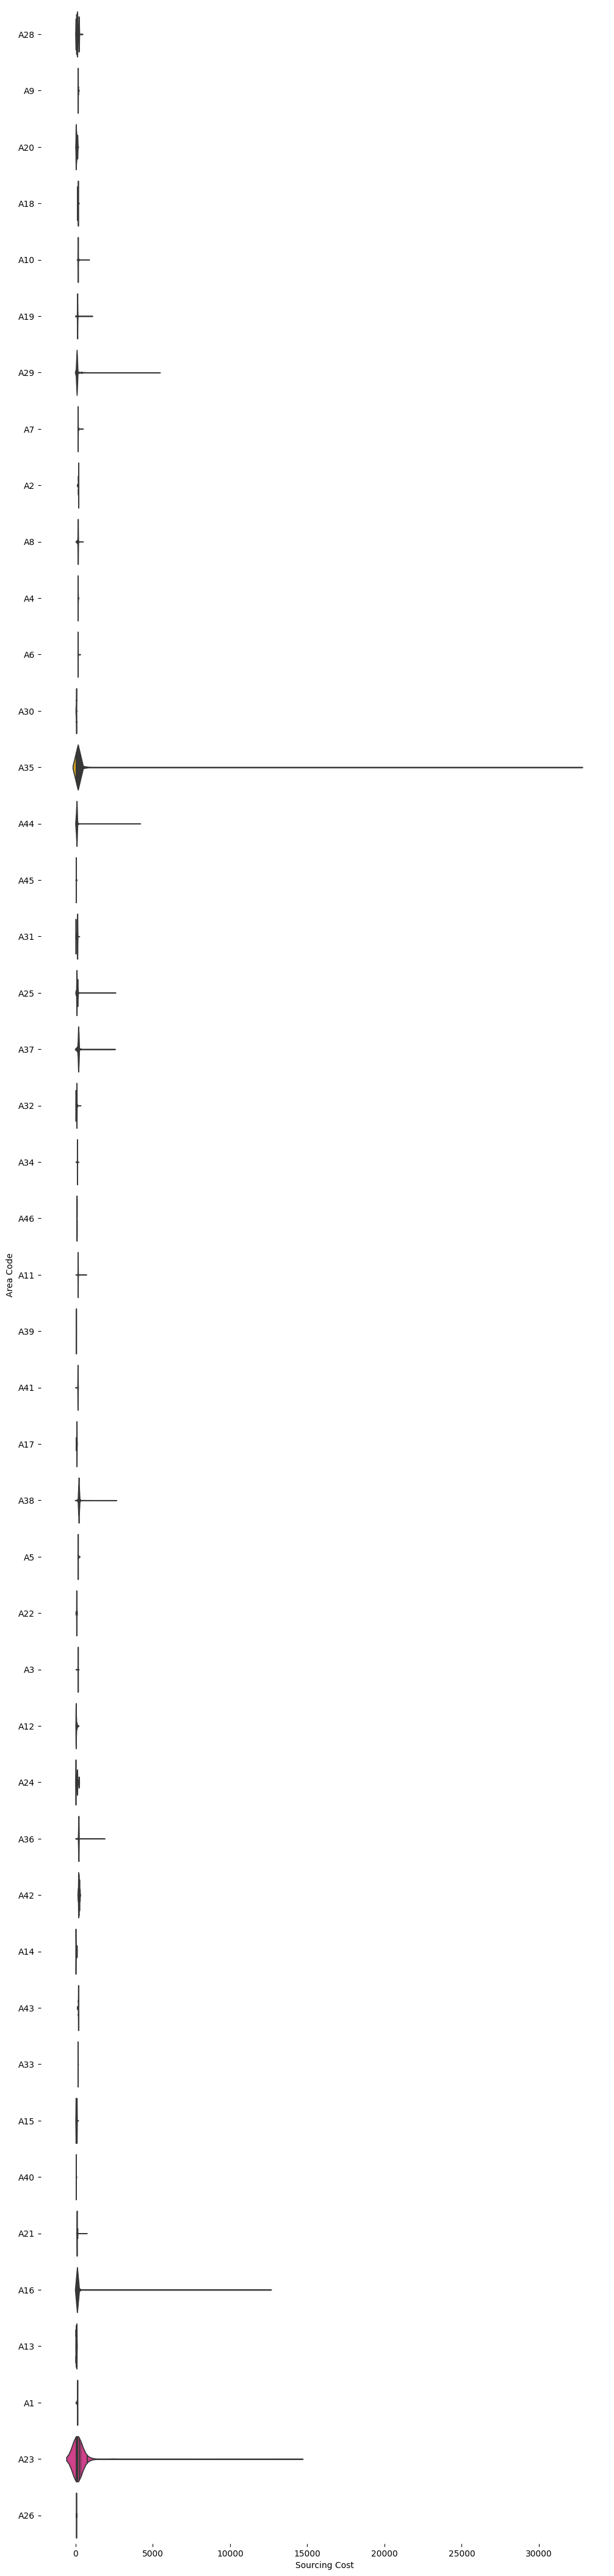

In [119]:
#Violin Plot for Area Code
figsize = (12, 1.2 * len(train_data['Area Code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Sourcing Cost', y='Area Code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-120-6981c7cb8f15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Sourcing Cost', y='Product Type', inner='stick', palette='Dark2')


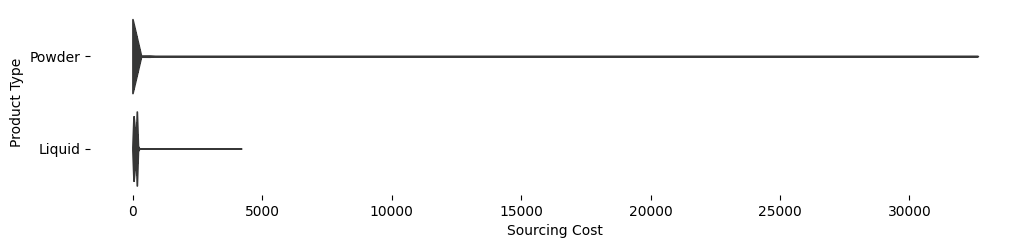

In [120]:
#Violin Plot for Product Type
figsize = (12, 1.2 * len(train_data['Product Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Sourcing Cost', y='Product Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-121-f6bd9b37f4c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Sourcing Cost', y='Sourcing Channel', inner='stick', palette='Dark2')


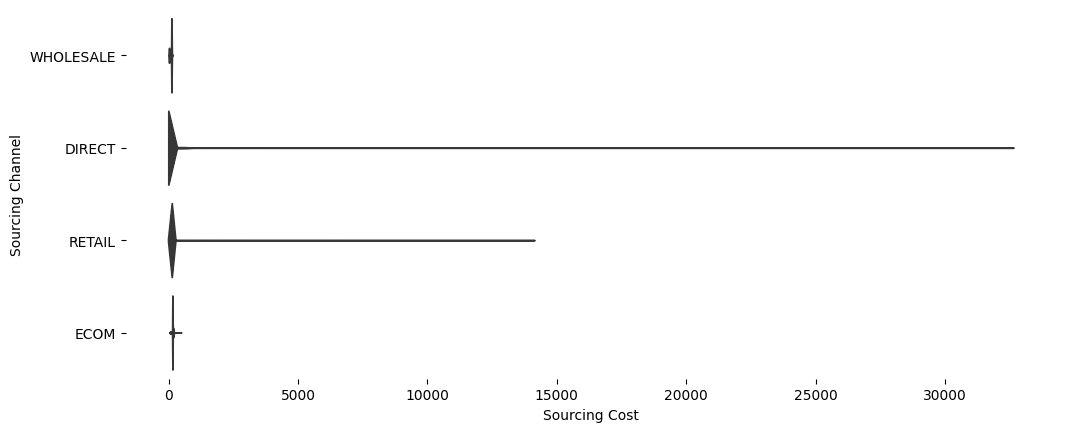

In [121]:
#Violin Plot for Sourcing Channel
figsize = (12, 1.2 * len(train_data['Sourcing Channel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Sourcing Cost', y='Sourcing Channel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-122-7814b89da66f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Sourcing Cost', y='Product Size', inner='stick', palette='Dark2')


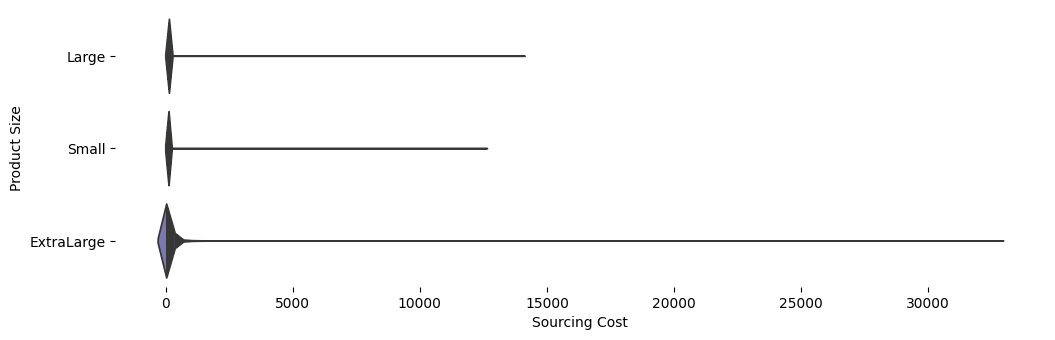

In [122]:
#Violin Plot for Product Size
figsize = (12, 1.2 * len(train_data['Product Size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Sourcing Cost', y='Product Size', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

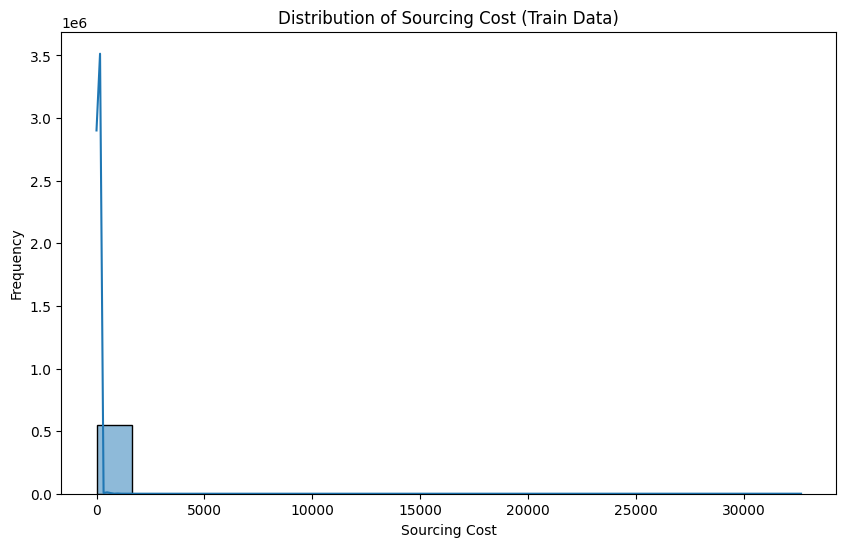

In [123]:
#Distribution for Sourcing Cost
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sourcing Cost'], bins=20, kde=True)
plt.title('Distribution of Sourcing Cost (Train Data)')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

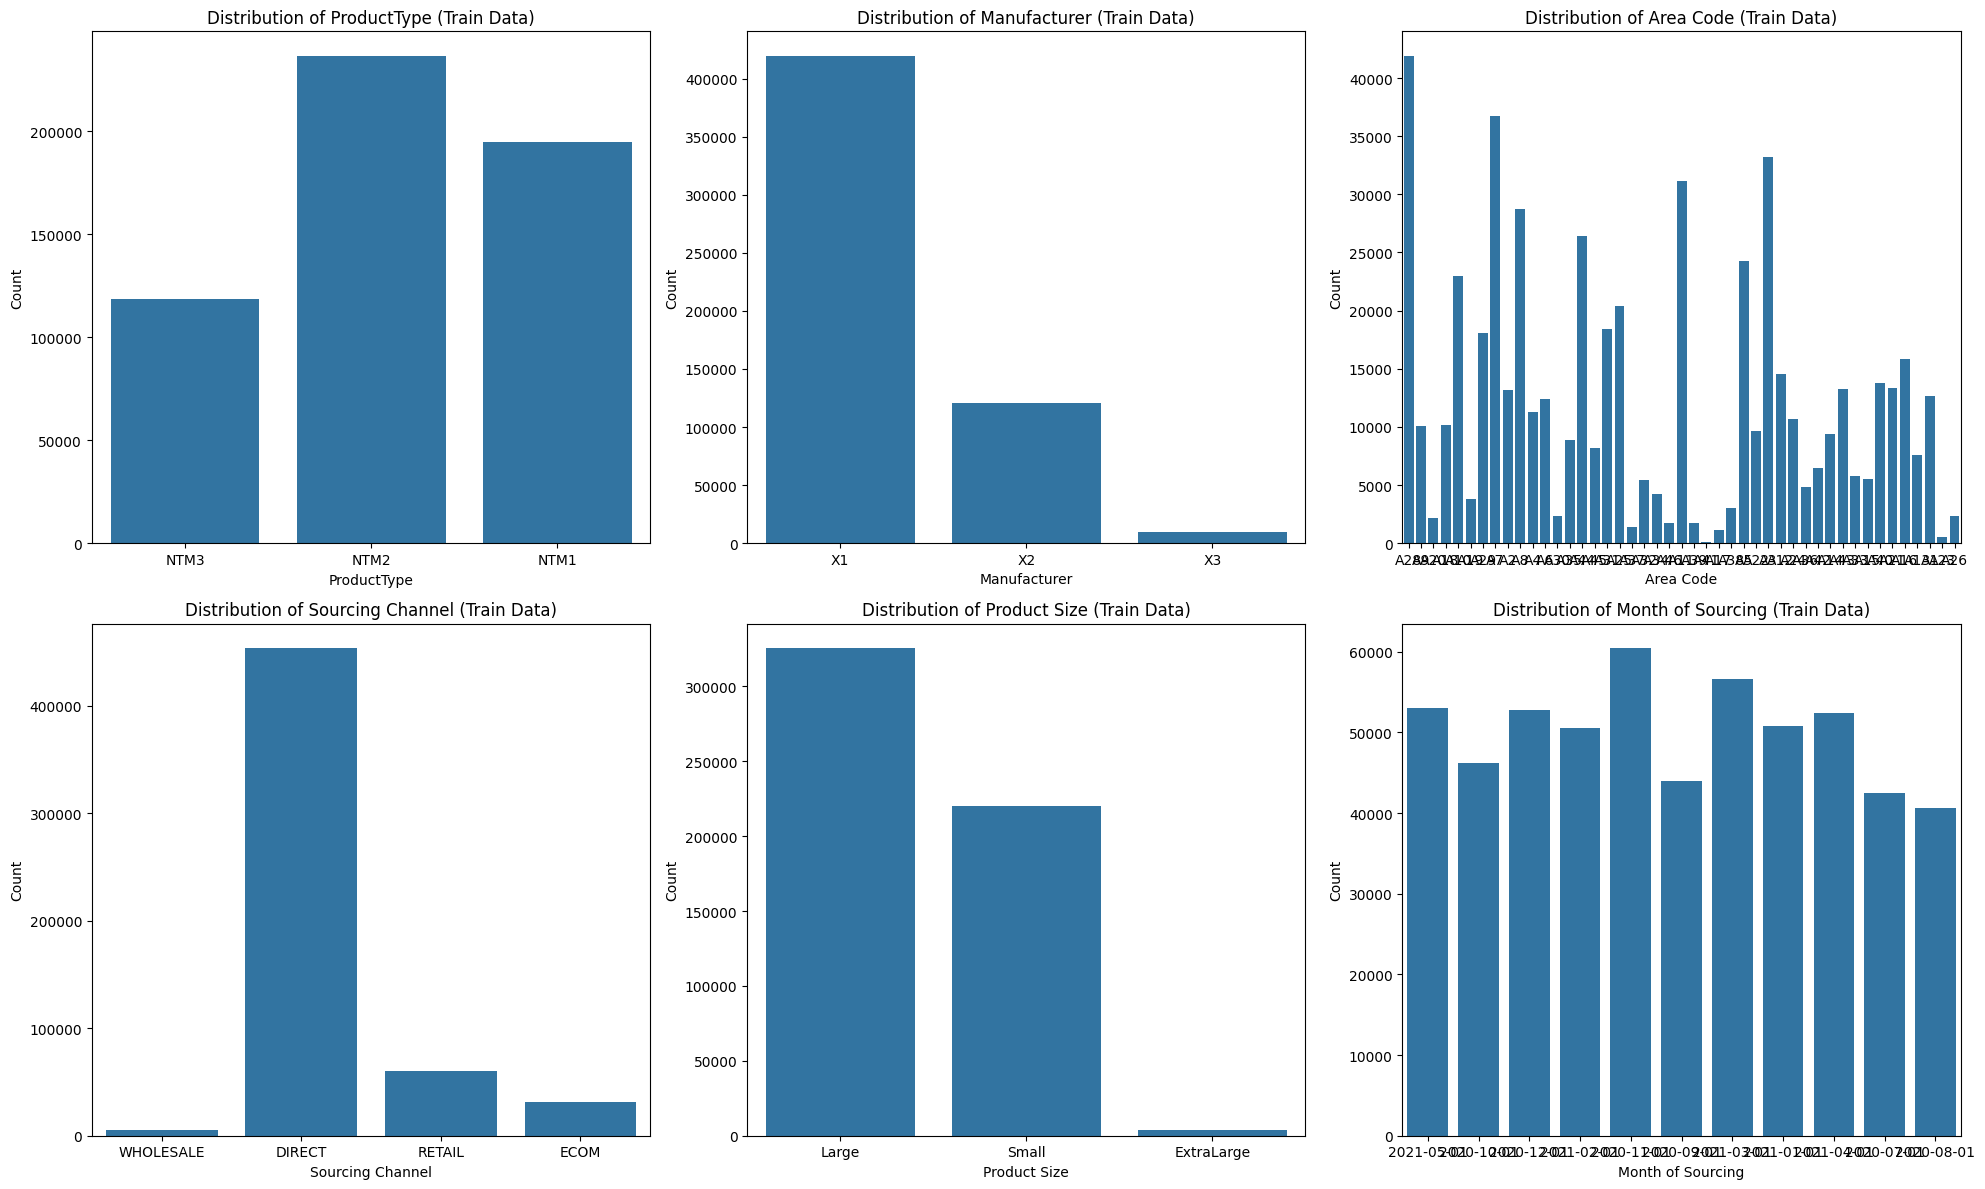

In [124]:
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Month of Sourcing']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(x=feature, data=train_data, ax=axes[row, col])
    axes[row, col].set_title('Distribution of ' + feature + ' (Train Data)')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [125]:
#Unique Values for the Categorical Features
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(unique_values)

['NTM3' 'NTM2' 'NTM1']
['X1' 'X2' 'X3']
['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']
['Large' 'Small' 'ExtraLarge']
['Powder' 'Liquid']
[1.016000e+01 1.342800e+02 1.246000e+01 ... 1.411072e+04 1.263047e+04
 3.705000e+03]


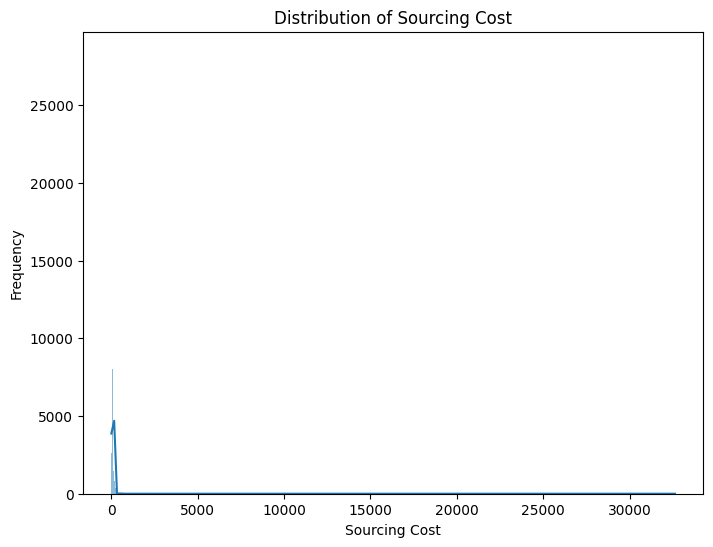

In [126]:
numerical_variables = train_data.select_dtypes(include=np.number).columns
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [127]:
#Printing value counts for Categorical Features
categorical_variables = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Area Code', 'Product Size', 'Product Type']
for var in categorical_variables:
    print(f"\nValue counts for {var}:")
    print(train_data[var].value_counts())


Value counts for ProductType:
NTM2    236560
NTM1    194922
NTM3    118510
Name: ProductType, dtype: int64

Value counts for Manufacturer:
X1    419700
X2    120668
X3      9624
Name: Manufacturer, dtype: int64

Value counts for Sourcing Channel:
DIRECT       453459
RETAIL        59985
ECOM          31106
WHOLESALE      5442
Name: Sourcing Channel, dtype: int64

Value counts for Area Code:
A28    41922
A7     36723
A3     33247
A11    31111
A8     28772
A44    26449
A5     24252
A10    22970
A25    20422
A31    18379
A29    18105
A16    15840
A12    14547
A40    13820
A21    13374
A43    13234
A2     13145
A1     12676
A6     12399
A4     11326
A24    10725
A18    10154
A9     10107
A22     9624
A14     9424
A35     8877
A45     8188
A13     7548
A42     6470
A33     5769
A15     5496
A32     5408
A36     4842
A34     4249
A19     3798
A38     3065
A26     2360
A30     2357
A20     2126
A46     1732
A39     1702
A37     1432
A17     1139
A23      569
A41      118
Name: Area Code, dtyp

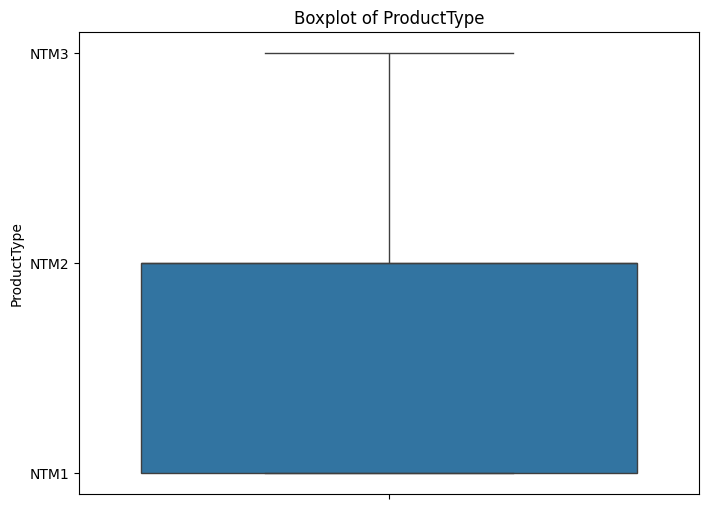

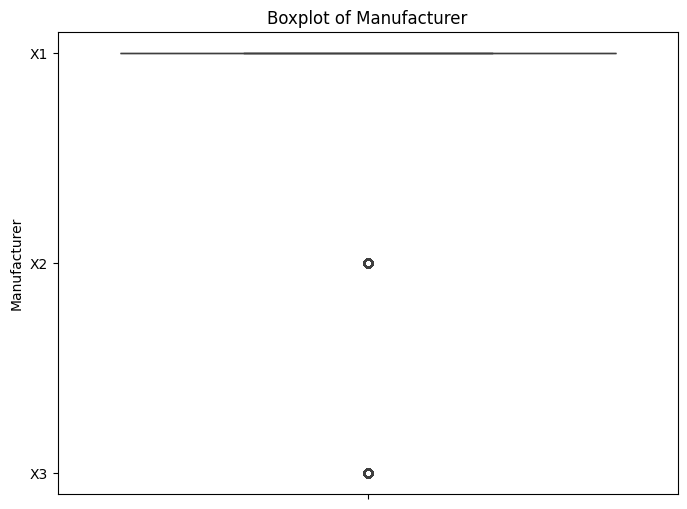

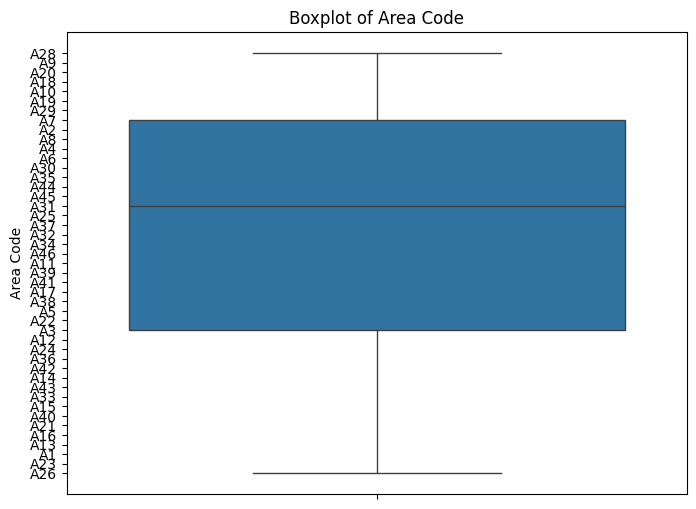

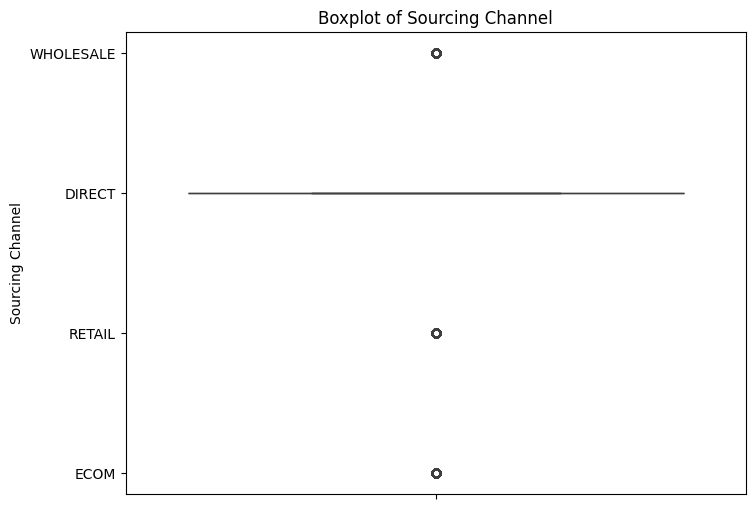

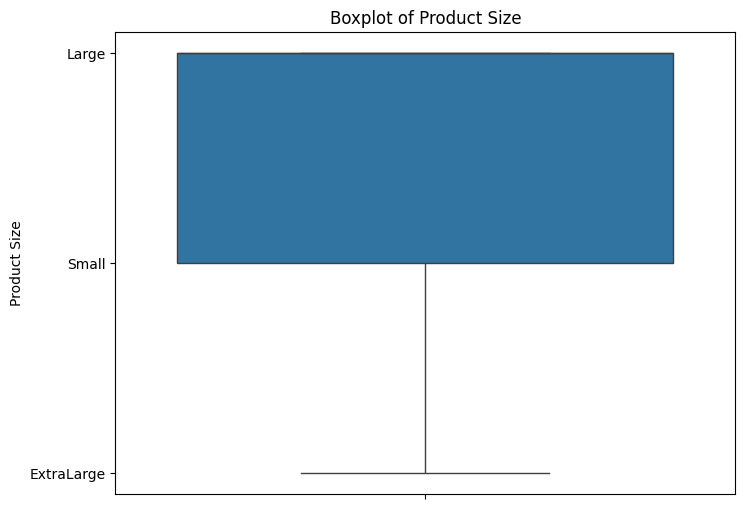

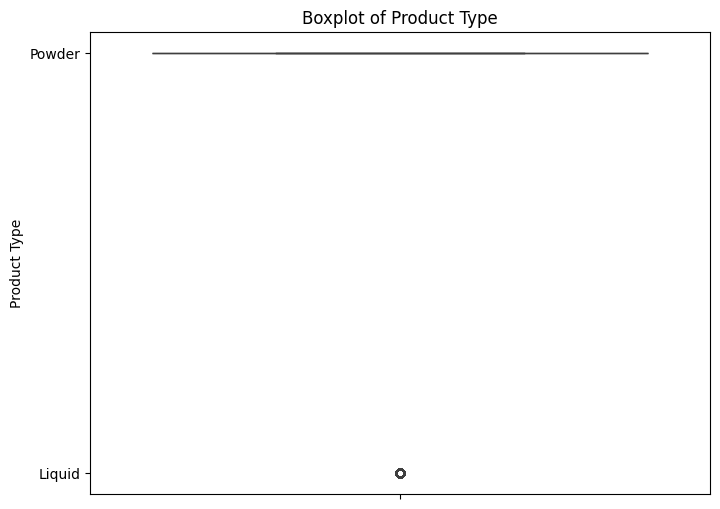

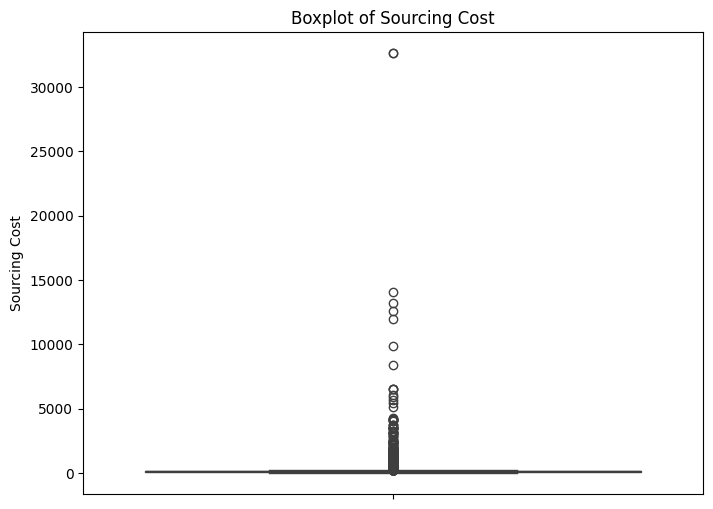

In [128]:
#Boxplots for checking the outliers
for column in train_data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=train_data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

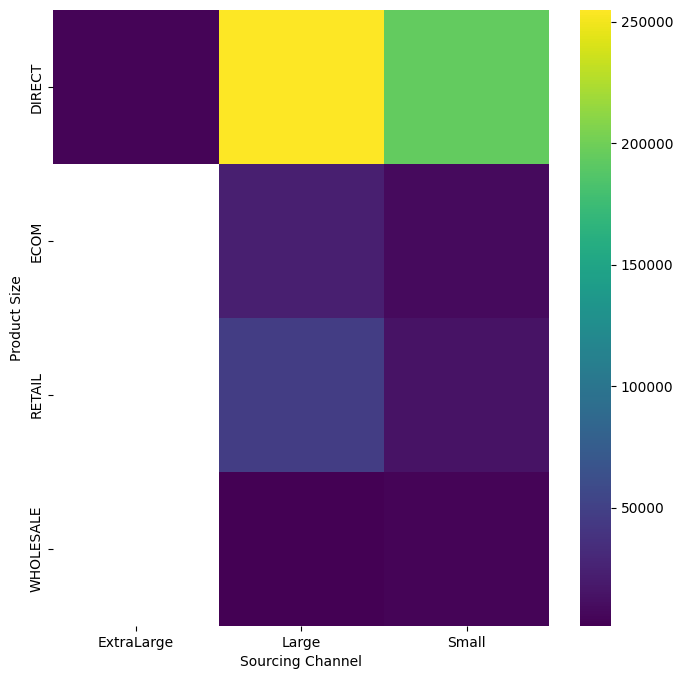

In [129]:
#HEatmap between Product Size and Sourcing Channel
plt.figure(figsize=(8, 8))
sns.heatmap(train_data.groupby('Sourcing Channel')['Product Size'].value_counts().unstack(), cmap='viridis')
plt.xlabel('Sourcing Channel')
plt.ylabel('Product Size')
plt.show()

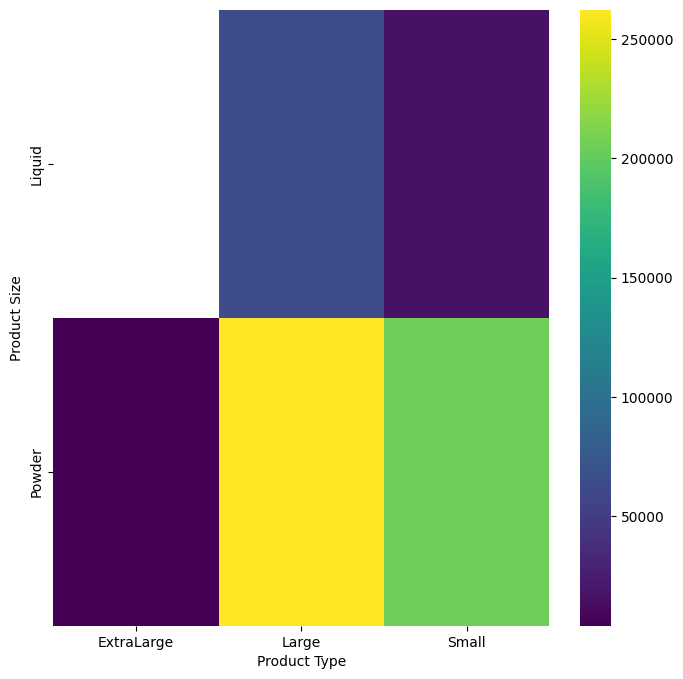

In [130]:
#Heatmap between Product Type and Product Size
plt.figure(figsize=(8, 8))
sns.heatmap(train_data.groupby('Product Type')['Product Size'].value_counts().unstack(), cmap='viridis')
plt.xlabel('Product Type')
plt.ylabel('Product Size')
plt.show()

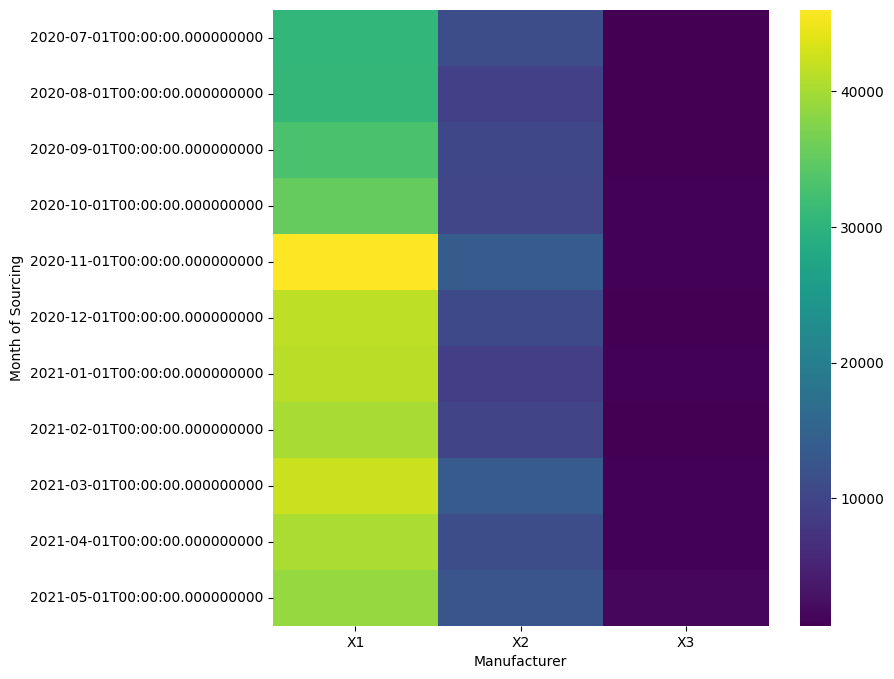

In [131]:
#Heatmap between Month of Sourcing and Manufacturer
plt.figure(figsize=(8, 8))
sns.heatmap(train_data.groupby('Month of Sourcing')['Manufacturer'].value_counts().unstack(), cmap='viridis')
plt.xlabel('Manufacturer')
plt.ylabel('Month of Sourcing')
plt.show()

#Preprocessing

In [35]:
#Checking for the outliers and removing them
Q1 = train_data['Sourcing Cost'].quantile(0.25)
Q3 = train_data['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = len(train_data[(train_data['Sourcing Cost'] < lower_bound) | (train_data['Sourcing Cost'] > upper_bound)])
print(outliers)
train_data = train_data[(train_data['Sourcing Cost'] >= lower_bound) & (train_data['Sourcing Cost'] <= upper_bound)]

2652


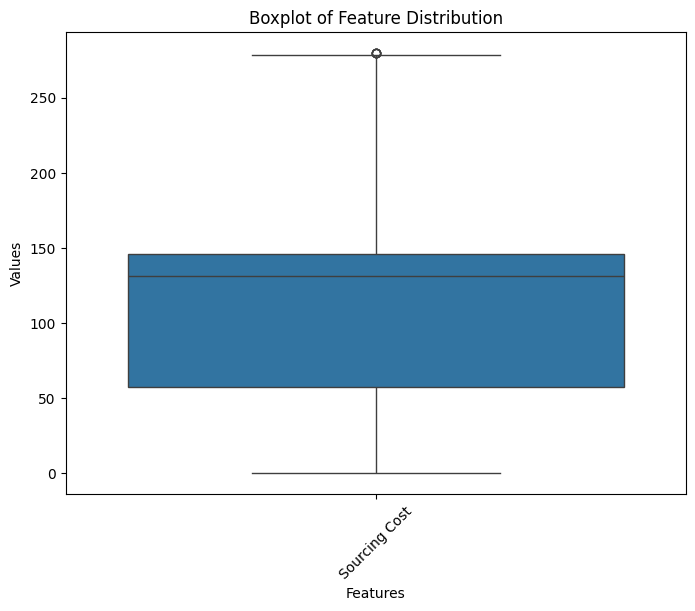

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data)
plt.title('Boxplot of Feature Distribution')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [37]:
#Label Encoded the Area Code column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Area Code']=le.fit_transform(train_data['Area Code'])
print(train_data.head())

                  ProductType Manufacturer  Area Code Sourcing Channel  \
Month of Sourcing                                                        
2021-05-01               NTM3           X1         19        WHOLESALE   
2020-10-01               NTM2           X1         44           DIRECT   
2020-12-01               NTM3           X2         12           DIRECT   
2021-02-01               NTM3           X1          9        WHOLESALE   
2020-11-01               NTM2           X1         19           DIRECT   

                  Product Size Product Type  Sourcing Cost  
Month of Sourcing                                           
2021-05-01               Large       Powder          10.16  
2020-10-01               Large       Powder         134.28  
2020-12-01               Large       Powder          12.46  
2021-02-01               Small       Powder         107.22  
2020-11-01               Large       Liquid         197.76  


In [38]:
print(train_data['Area Code'])

Month of Sourcing
2021-05-01    19
2020-10-01    44
2020-12-01    12
2021-02-01     9
2020-11-01    19
              ..
2020-07-01    40
2020-10-01     5
2021-03-01    40
2021-02-01    42
2020-11-01    21
Name: Area Code, Length: 547340, dtype: int64


In [39]:
#One Hot Encoding the Categorical Features for train set
categorical_features = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
train_data=pd.get_dummies(train_data, columns=categorical_features)
print(train_data.head())

                   Area Code  Sourcing Cost  ProductType_NTM1  \
Month of Sourcing                                               
2021-05-01                19          10.16             False   
2020-10-01                44         134.28             False   
2020-12-01                12          12.46             False   
2021-02-01                 9         107.22             False   
2020-11-01                19         197.76             False   

                   ProductType_NTM2  ProductType_NTM3  Manufacturer_X1  \
Month of Sourcing                                                        
2021-05-01                    False              True             True   
2020-10-01                     True             False             True   
2020-12-01                    False              True            False   
2021-02-01                    False              True             True   
2020-11-01                     True             False             True   

                   Manufa

In [40]:
le=LabelEncoder()
test_data['Area Code']=le.fit_transform(test_data['Area Code'])
print(test_data.head())

                  ProductType Manufacturer  Area Code Sourcing Channel  \
Month of Sourcing                                                        
2021-06-01               NTM1           X1          0           DIRECT   
2021-06-01               NTM1           X1          1           DIRECT   
2021-06-01               NTM1           X1          1             ECOM   
2021-06-01               NTM1           X1          2           DIRECT   
2021-06-01               NTM1           X1         11           DIRECT   

                  Product Size Product Type  Sourcing Cost  
Month of Sourcing                                           
2021-06-01               Small       Powder         103.68  
2021-06-01               Large       Powder         155.75  
2021-06-01               Large       Powder         143.02  
2021-06-01               Large       Powder         139.39  
2021-06-01               Large       Powder         169.42  


In [41]:
#One Hot Encoding the Categorical Features for test set
categorical_features = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
test_data=pd.get_dummies(test_data, columns=categorical_features)
print(test_data.head())

                   Area Code  Sourcing Cost  ProductType_NTM1  \
Month of Sourcing                                               
2021-06-01                 0         103.68              True   
2021-06-01                 1         155.75              True   
2021-06-01                 1         143.02              True   
2021-06-01                 2         139.39              True   
2021-06-01                11         169.42              True   

                   ProductType_NTM2  ProductType_NTM3  Manufacturer_X1  \
Month of Sourcing                                                        
2021-06-01                    False             False             True   
2021-06-01                    False             False             True   
2021-06-01                    False             False             True   
2021-06-01                    False             False             True   
2021-06-01                    False             False             True   

                   Manufa

#Model Training

In [48]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
target='Sourcing Cost'

X_train=train_data.drop(columns=[target], axis=1)
y_train=train_data[target]

X_test=test_data.drop(columns=[target], axis=1)
y_test=test_data[target]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (547340, 16)
y_train shape: (547340,)
X_test shape: (96, 16)
y_test shape: (96,)


##Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 35.21411021407542
Mean Squared Error (MSE): 2207.0755268345088
Root Mean Squared Error (RMSE): 46.97952242024719
R-squared (R2) Score: 0.18646899328878974


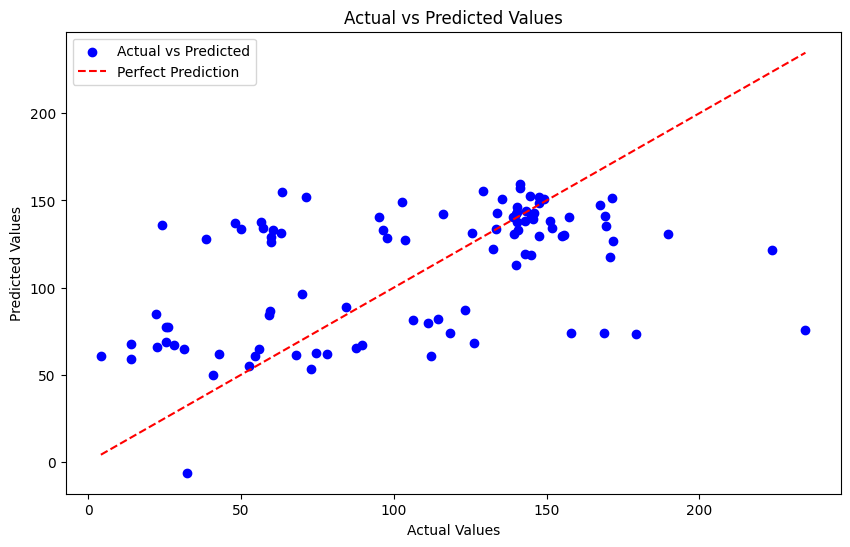

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

##Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
y_pred_rf = random_forest.predict(X_test)

In [54]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 17.07523596996986
Mean Squared Error (MSE): 1116.9134229942122
Root Mean Squared Error (RMSE): 33.420254681767645
R-squared (R2) Score: 0.5883042105401056


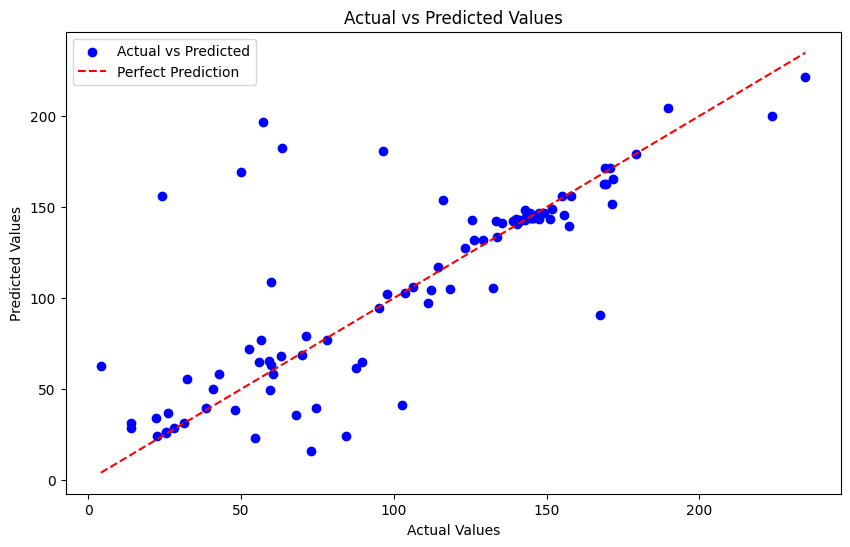

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

##XG Boost

In [55]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred_xg = xgb.predict(X_test)

In [63]:
mae = mean_absolute_error(y_test, y_pred_xg)
mse = mean_squared_error(y_test, y_pred_xg)
rmse = mean_squared_error(y_test, y_pred_xg, squared=False)
r2 = r2_score(y_test, y_pred_xg)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 17.07536459604899
Mean Squared Error (MSE): 1117.296979798021
Root Mean Squared Error (RMSE): 33.42599257760375
R-squared (R2) Score: 0.588162830986511


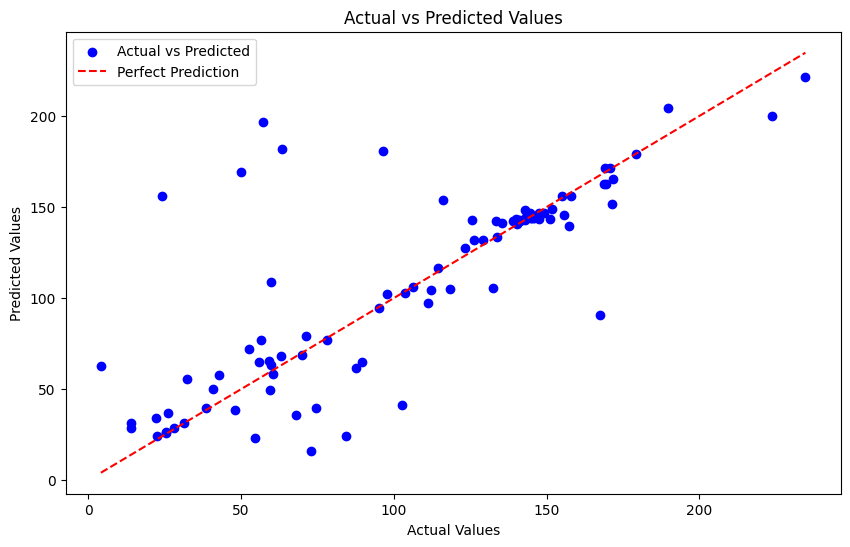

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

##Light Boost

In [60]:
from lightgbm import LGBMRegressor
lg=LGBMRegressor()
lg.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 547340, number of used features: 16
[LightGBM] [Info] Start training from score 106.352029


LGBMRegressor()

In [61]:
y_pred_lg=lg.predict(X_test)

In [62]:
mae = mean_absolute_error(y_test, y_pred_lg)
mse = mean_squared_error(y_test, y_pred_lg)
rmse = mean_squared_error(y_test, y_pred_lg, squared=False)
r2 = r2_score(y_test, y_pred_lg)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 17.001476876751635
Mean Squared Error (MSE): 1108.9611703199423
Root Mean Squared Error (RMSE): 33.30106860627662
R-squared (R2) Score: 0.5912354215680307


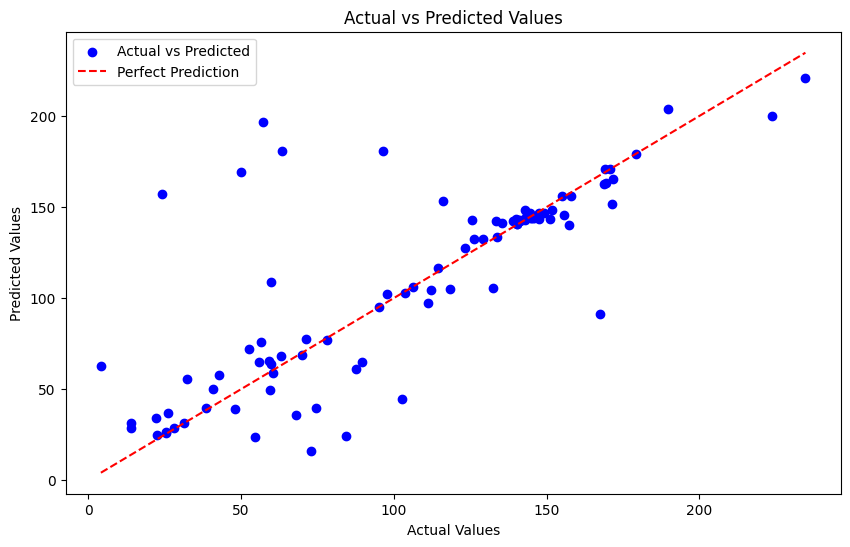

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lg, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#Explanation

##1. About Dataset
After importing the dataset and conducting initial operations, I gained insights into the data. I observed that the training data contains numerous duplicate values. Although I considered removing them, I opted against it due to the data's frequent occurrences and variations. Additionally, I noticed negative values in the Sourcing Cost column of the training set but not in the test set. As someone learning about the domain, I decided to exclude these negative costs as they seemed unrealistic to me.

##2. EDA
I conducted various visualizations on the dataset to grasp the patterns and correlations among its features. I attempted Time Series Data Analysis due to the presence of the "Month of Sourcing" feature, but I struggled to discern the dataset's sequentiality. Despite this, I managed to derive insights from some visualizations related to Time Series Analysis. By plotting boxplots for the features, I identified outliers and chose to eliminate them to mitigate measurement errors, remove unrepresentative data points, and enhance the model's performance.

##3. Preprocessing
During preprocessing, I encoded the categorical features. I utilized Label Encoding for the "Area Code" and One Hot Encoding for the other categorical features, selecting the method based on their unique values.

##4. Model Training
As mentioned, I attempted Time Series Data Analysis on the dataset and aimed to implement the ARIMA Model for deeper insights and direction. However, due to the high computational demands of the model, I couldn't execute it. Given my prior experience with ML Regressor Models, I decided to tackle the problem using that approach instead.

Initially planning to employ ARIMA and GRU Models, I pivoted to regressor models such as Linear Regression, Random Forest, XG Boost, and Light Boost when computational constraints arose.

Upon analysis, the results were as follows:
* Light Boost exhibited the smallest MSE.
* Light Boost displayed the smallest RMSE.
* Light Boost achieved the highest R2 score.
* Random Forest yielded the lowest MAE.

##5. Future Scope
Since I couldn't execute the ARIMA model due to its computational requirements, I consider it a potential area for future exploration in my approach. Additionally, I aim to enhance visualization techniques to better comprehend the sequential relationships and patterns among the features.

